5. Implement Agglomerative hierarchical clustering algorithm using appropriate dataset. Dendrogram(the big tree-like plot)

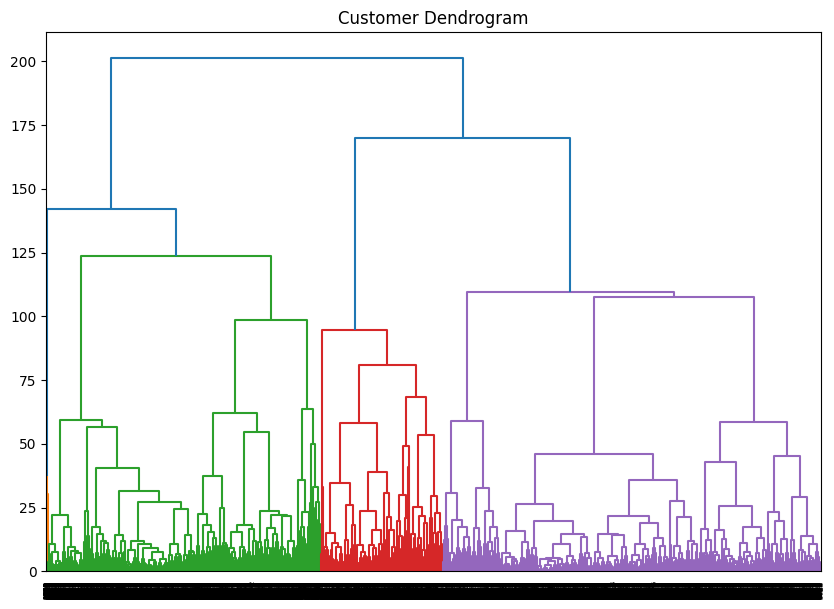

Cluster labels for the first 10 customers:
[1 2 0 1 1 1 0 0 1 1]


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc

# --- 1. Load & Pre-process Data ---
# Load the dataset
X = pd.read_csv('CC GENERAL.csv')

# Drop the ID column
X = X.drop('CUST_ID', axis=1)

# Handle missing values (fill with the value from the row before)
# FIX: Use .ffill() directly, as method='ffill' is deprecated
X.ffill(inplace=True) 

# Standardizing the data is ESSENTIAL for this algorithm
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2. Implement Hierarchical Clustering & Plot Dendrogram ---
# This is the core of the algorithm: building the hierarchy
plt.figure(figsize=(10, 7))
plt.title("Customer Dendrogram")
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))
plt.show()

# --- 3. Get Cluster Labels (Example) ---
# After looking at the dendrogram, you pick a 'k' (e.g., 3 clusters)
# Then you "cut the tree" to get your labels.
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = cluster.fit_predict(X_scaled)

# You can now see which cluster each customer belongs to:
print("Cluster labels for the first 10 customers:")
print(labels[:10])

In [14]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Program Files\Python313\python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [16]:
# Load the dataset
X = pd.read_csv('CC GENERAL.csv')

# Dropping the 'CUST_ID' column
X = X.drop('CUST_ID', axis=1)

# Handling the missing values (forward fill method)
X.fillna(method='ffill', inplace=True)

C:\Users\sayal\AppData\Local\Temp\ipykernel_16704\2479492342.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


In [17]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [18]:
# Reducing the dimensions with PCA
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

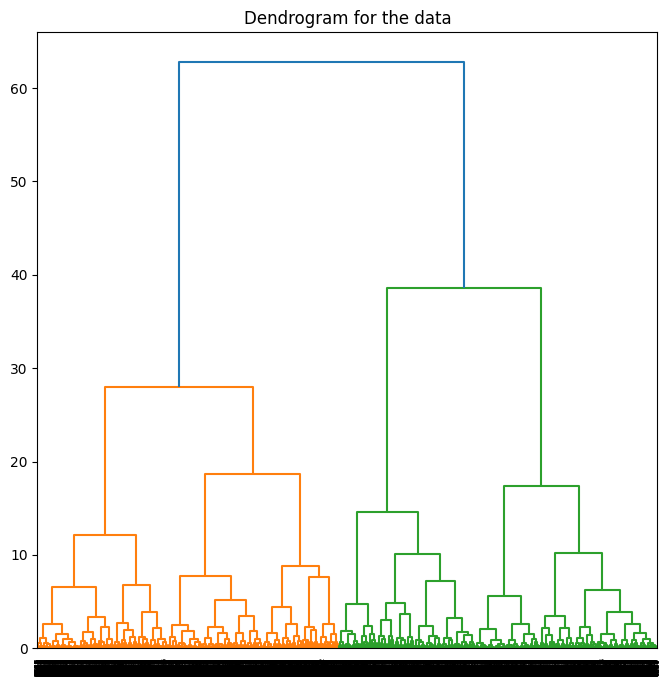

In [19]:
plt.figure(figsize=(8, 8))
plt.title('Dendrogram for the data')
dendrogram = shc.dendrogram(shc.linkage(X_principal, method='ward'))
plt.show()

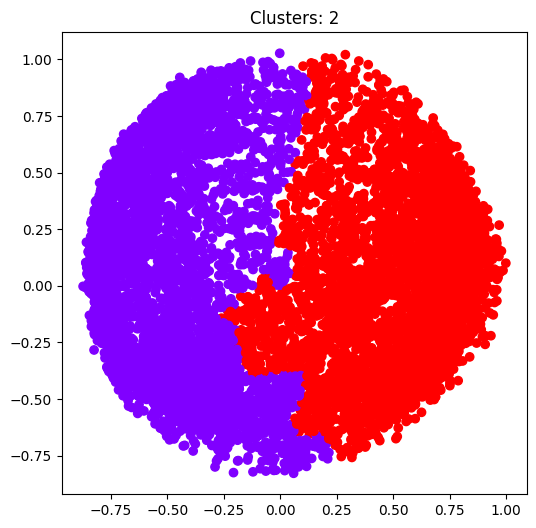

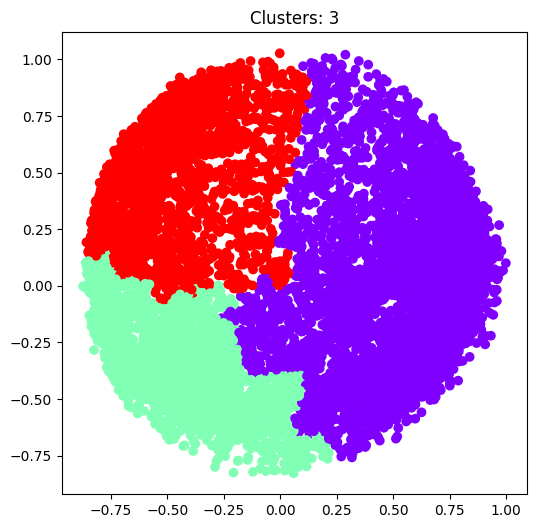

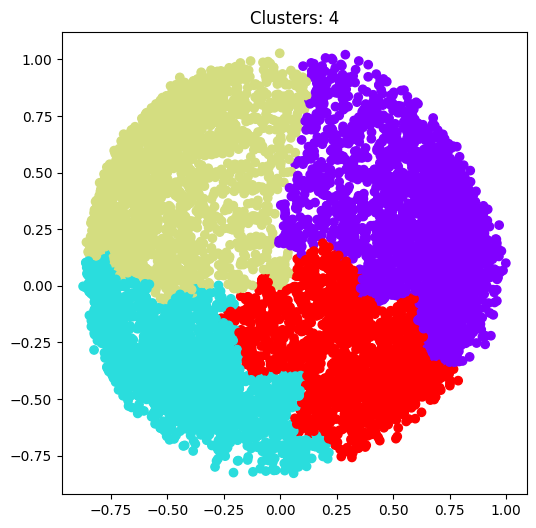

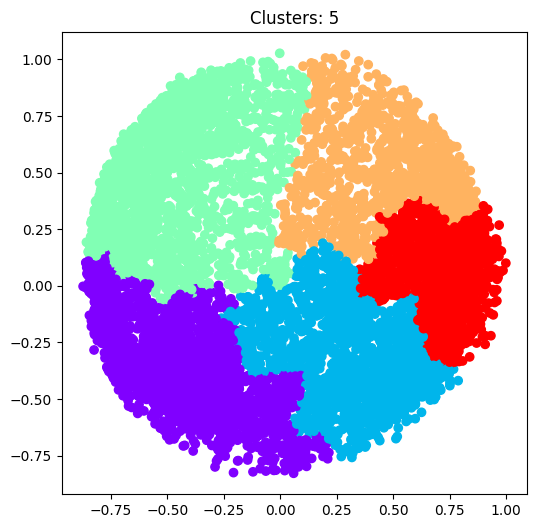

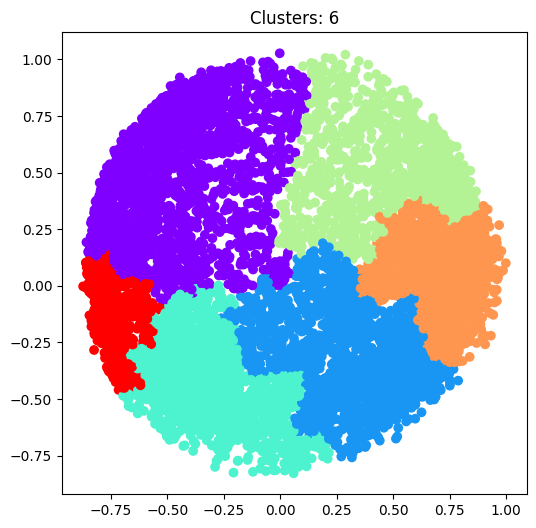

In [20]:
# Clustering with different number of clusters (k)
cluster_counts = [2, 3, 4, 5, 6]

for k in cluster_counts:
    ac = AgglomerativeClustering(n_clusters=k)
    plt.figure(figsize=(6, 6))
    plt.scatter(X_principal['P1'], X_principal['P2'], c=ac.fit_predict(X_principal), cmap='rainbow')
    plt.title(f'Clusters: {k}')
    plt.show()

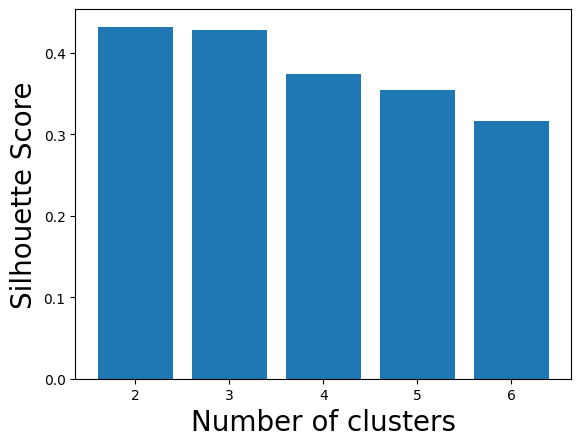

In [22]:
# Calculating silhouette scores for different k values
silhouette_scores = []

for k in cluster_counts:
    ac = AgglomerativeClustering(n_clusters=k)
    labels = ac.fit_predict(X_principal)
    silhouette_scores.append(silhouette_score(X_principal, labels))

# Plotting the silhouette scores
plt.bar(cluster_counts, silhouette_scores)
plt.xlabel('Number of clusters', fontsize=20)
plt.ylabel('Silhouette Score', fontsize=20)
plt.show()


Purpose of the Practical
The purpose is to perform unsupervised clustering on the credit card customer dataset (CC GENERAL.csv). Since we don't have labels for these customers, our goal is to use their spending habits and account information (balance, tenure, etc.) to automatically discover "natural" groups or segments within the data.

The practical shows the full workflow:

Pre-process the data.

Reduce its complexity so we can visualize it.

Build the clustering model.

Evaluate the model to find the optimal number of clusters.

🧠 Core Theory (How it Works)
This practical uses three main techniques:

Agglomerative Hierarchical Clustering: This is the core algorithm. It's a "bottom-up" clustering method.

It starts by treating every single customer as its own cluster.

It finds the two "closest" (most similar) clusters and merges them into one.

It repeats this, merging the next two closest clusters, until all customers are in one single giant cluster.

Dendrogram: This is the key visualization for this algorithm.

It's a tree-like diagram that shows the exact order and "distance" of all the merges.

You decide the number of clusters (k) by finding a horizontal line ("cut") that crosses 'k' vertical lines without splitting any clusters.

PCA (Principal Component Analysis): Our dataset has 17 columns (dimensions), which is impossible to plot. PCA is a dimensionality reduction technique. It "flattens" or "squashes" all 17 features into just 2 main components (P1 and P2) that capture the most important patterns, allowing us to plot the data on a 2D scatter graph.

Silhouette Score: This is our evaluation metric used to find the "best" k.

It measures how well-separated and dense the clusters are, on a scale from -1 to +1.

+1: Perfect score. Clusters are dense and far apart.

0: Clusters overlap.

-1: Worst score. Points are likely in the wrong cluster.

We calculate this score for different k values (like 2, 3, 4, 5, 6) and the k with the highest score is considered the optimal choice.

📋 Step-by-Step Code Explanation
Import Libraries:

pandas: To load and clean the CC GENERAL.csv data.

StandardScaler & normalize: To clean and scale the data.

PCA: To reduce dimensions for plotting.

AgglomerativeClustering: The clustering algorithm itself.

silhouette_score: The metric to evaluate the clusters.

scipy.cluster.hierarchy as shc: Used specifically to plot the dendrogram.

matplotlib.pyplot as plt: For all the plots.

Load & Pre-process Data:

Load CC GENERAL.csv into a pandas DataFrame X.

Drop the CUST_ID column because it's just an ID, not a useful feature.

Use X.ffill(inplace=True) to fill any missing data (this was the fix for the FutureWarning).

StandardScaler: This is a critical step. It scales all features (like 'BALANCE' and 'TENURE') so they have a similar range. This prevents features with large numbers from dominating the algorithm.

Dimensionality Reduction (PCA):

Create a PCA object with n_components=2.

Use .fit_transform() on the scaled data to create X_principal, which is our new 2-dimensional dataset for plotting.

Plot Dendrogram:

shc.linkage(X_principal, method='ward'): This is the function that builds the cluster hierarchy. method='ward' is a common strategy that minimizes variance when merging clusters.

shc.dendrogram(...): This function takes the linkage results and plots them as the tree diagram.

Cluster & Plot (Loop):

The code loops k from 2 to 6.

Inside the loop, it creates an AgglomerativeClustering model for each k.

ac.fit_predict(X_principal): This trains the model and assigns a cluster label (0, 1, 2, etc.) to each customer.

plt.scatter(...): It creates a scatter plot of our 2D data, coloring the points based on their assigned cluster label. This shows you visually what the clusters look like.

Find Best k (Silhouette Score):

This is the final evaluation. The code loops k from 2 to 6 again.

It fits the model and gets the labels just like before.

It calculates the silhouette_score(X_principal, labels) for that k.

Finally, it plots all the scores on a bar chart, making it easy to see which k (which bar) is the highest. This is your "answer."

🛠️ Key Libraries & Functions
sklearn.preprocessing.StandardScaler: Essential for clustering. Makes all features equally important.

sklearn.decomposition.PCA: Reduces many columns (dimensions) down to 2 for plotting.

scipy.cluster.hierarchy.linkage: The core function that calculates the cluster hierarchy.

scipy.cluster.hierarchy.dendrogram: The function that plots the hierarchy tree.

sklearn.cluster.AgglomerativeClustering: The main algorithm class. The key parameter is n_clusters=k.

.fit_predict(data): A helpful function that both trains the model and returns the cluster labels for each data point.

sklearn.metrics.silhouette_score: The most important function for evaluation. It tells you how good your clusters are.